# Article Summarizer & Sentiment Analysis
## Abby Lloyd

### Description: 
- This project scrapes reviews of two movies, creates a summarized review for each movie, and performs sentiment analysis on the summarized reviews. The summaries and results of the sentiment analysis are then presented for comparison.

### Skills Demonstrated:
- Web Mining (Requests, Beautiful Soup)
- NLP (SpaCy)
- Python Coding
- Matplotlib Visualizations

### Github Link: https://github.com/abbylloyd03/Portfolio

#  -------- Section 1 ----------

**Goals:**
- Mine text from first webpage & read in source HTML
- Perform sentiment analysis on entire webpage for later reference
- Determine how many sentences are in article. This will help determine how many sentences should be in the summary.

**Warning:** The webpage used for this analysis constantly changes. As the webpage changes, the results of this project will change, and the analysis may no longer be accurate.

**Webpage:** https://www.rottentomatoes.com/m/black_panther_wakanda_forever/reviews

### Step 1: Import necessary packages

In [1]:
import requests
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Get HTML from webpage and dump into pickle file

In [2]:
article_page = requests.get('https://www.rottentomatoes.com/m/black_panther_wakanda_forever/reviews')
article_html = article_page.text

with open('article_html.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

### Step 3: Read in source HTML 

In [3]:
with open('article_html.pkl', 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, 'html5lib')

# Find the reviews from the article. (This is the only part of the article I am interested in.)

article_content = soup.find_all('div', {'class': 'the_review'})

# Combine all the reviews into one string and get rid of tags

article_content_string = ' '.join([item.text for item in article_content])

### Step 4: Check work

In [4]:
print(article_content_string)


                    A moving and entertaining superhero action movie that forges a bright new path for the Black Panther legacy. It’s the follow-up that fans needed. 
                 
                    There is indeed a  smattering of the character development. No doubt all abustle, some critics just understandably might’ve missed the transmogrifications. (Hint: Look for someone putting on a mask and another going all hue-y.)
                 
                    It’s generally well-paced and features an excellent lead performance from Wright and an Oscar-worthy performance from Bassett. For a movie with a complicated hole to dig itself out of, this sequel rises victorious.
                 
                    Kind of a mixed bag, but worth seeing if you liked the first one. 
                 
                    This film, leading into phase five, makes it as symbolic as it is impactful. It expands the MCU’s diversity through sheer authenticity.
                 
                

### Step 5: Perform sentiment analysis on entire article
- This will be compared with the sentiment analysis of the summary of the article, which will be produced later

In [5]:
# Sentiment analysis

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content_string)
print(f'Polarity: {doc._.polarity}')

Polarity: 0.17849099099099106


### Step 6: Determine how many sentences are in article

In [6]:
sentences = list(doc.sents)
sentences_no_blanks = [str(x).strip() for x in sentences if str(x) != '']
num_of_sents = len(sentences_no_blanks)
print('Number of sentences:', num_of_sents)

Number of sentences: 38


# -------- Section 2 ----------

**Goals:**
- Load article into trained spaCy pipeline
- Determine 5 most frequent tokens
- Determine 5 most frequent lemmas
- Determine how often the 5 most of frequent tokens occur in each sentence. Make a histogram showing results.
- Determine how often the 5 most of frequent lemmas occur in each sentence. Make a histogram showing results.
- Determine "cutoff" score for sentence inclusion in summary.

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

### Step 1: Load article text into trained spaCy pipeline

In [7]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_content_string)

### Step 2: Determine 5 most frequent tokens

In [8]:
# Add the movie title and other words I am not interested into the list of stop words
# nlp.Defaults.stop_words |= {'black', 'panther', 'wakanda', 'forever', 'movie', 'film'}
# I didn't like the summary, so I went back to the original stop words


# Remove whitespace, punctuation, and stopword tokens
# Convert all letters to lowercase

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.lower_ for token in doc if we_care_about(token)]

# Count & print token frequency

word_freq = Counter(map(str,interesting_tokens))
print('Five most frequent tokens:', word_freq.most_common(5))

Five most frequent tokens: [('black', 6), ('movie', 5), ('panther', 5), ('film', 5), ('going', 4)]


### Step 3: Determine 5 most frequent lemmas

In [9]:
# Lemmatization
# Convert all letters to lowercase

interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]

# Count & print lemma frequency

lemma_freq = Counter(interesting_lemmas)
print('Five most frequent lemmas:', lemma_freq.most_common(5))

Five most frequent lemmas: [('black', 6), ('movie', 5), ('panther', 5), ('film', 5), ('go', 4)]


### Step 4: Make histogram. How often do the most frequent tokens occur per sentence?

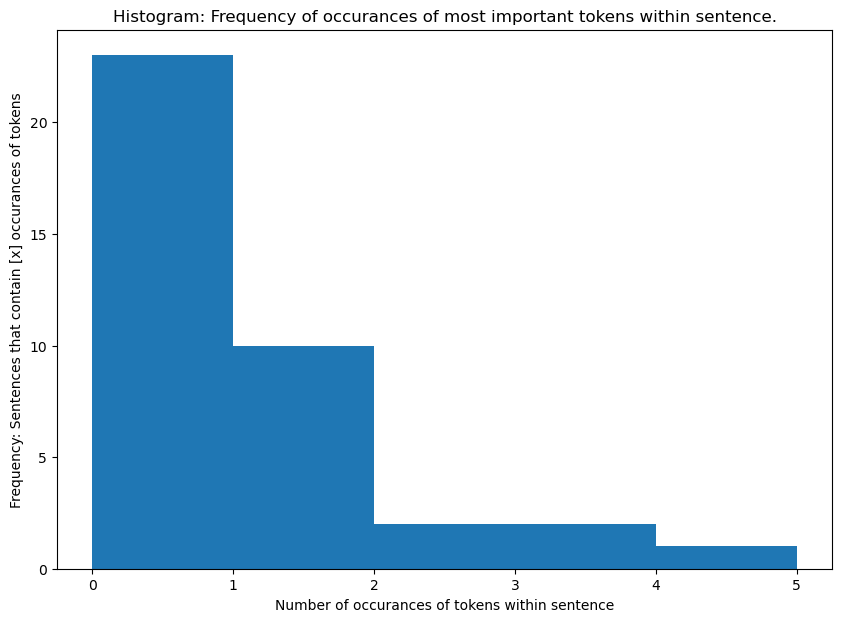

In [10]:
# Make a list (x) of token counts per sentence. This will be used for the histogram.

def score_sentence_by_token_for_histogram(sentences, interesting_token):
    list = []
    unpacked_tokens = set()
    for token, freq in interesting_token:
        unpacked_tokens.add(token)
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lower_ in unpacked_tokens:
                count += 1
        list.append(count)
    return list

x = score_sentence_by_token_for_histogram(sentences, word_freq.most_common(5))

# Create plot

fig, ax = plt.subplots(figsize =(10, 7))
n_bins = max(x)
ax.hist(x, n_bins)

# Set title
ax.set_title('Histogram: Frequency of occurances of most important tokens within sentence.')
  
# adding labels
ax.set_xlabel('Number of occurances of tokens within sentence')
ax.set_ylabel('Frequency: Sentences that contain [x] occurances of tokens')
ax.set_xticks([0, 1, 2, 3, 4, 5])

### Step 5: Analyze Results
- Most sentences in the article have 0-1 occurances of the most frequent tokens.
- It is less common for sentences to have 2-4 occurances of the most frequent tokens.

### Step 6: Make another histogram. How often do the most frequent lemmas occur per sentence?

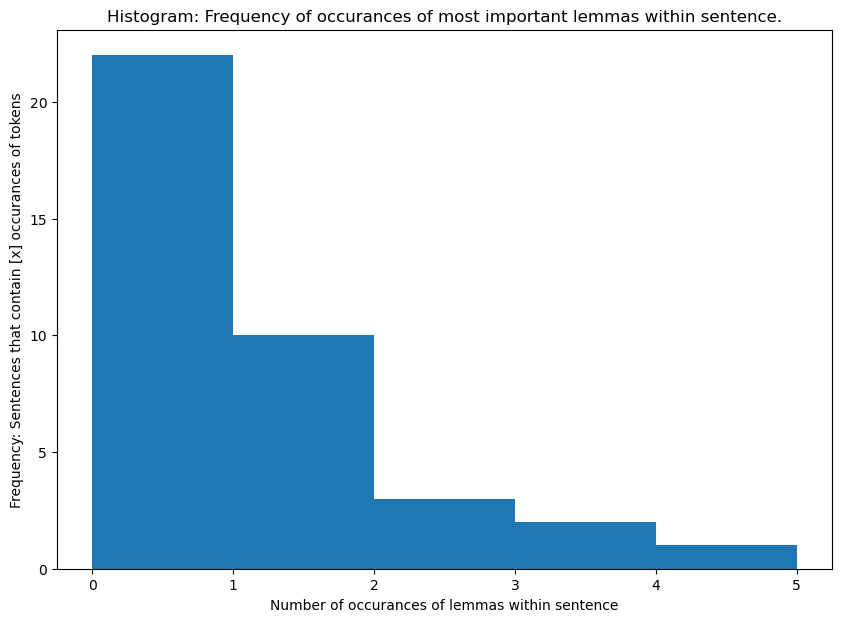

In [16]:
# Make a list of lemma counts per sentence (x) for histogram

def score_sentence_by_lemma_for_histogram(sentences, interesting_lemmas):
    list = []
    unpacked_lemmas = set()
    for lemma, freq in interesting_lemmas:
        unpacked_lemmas.add(lemma)
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lemma_.lower() in unpacked_lemmas:
                count += 1
        list.append(count)
    return list


x = score_sentence_by_lemma_for_histogram(sentences, lemma_freq.most_common(5))

# Create plot

fig, ax = plt.subplots(figsize =(10, 7))
n_bins = max(x)
ax.hist(x, n_bins)

# Set title
ax.set_title("Histogram: Frequency of occurances of most important lemmas within sentence.")
  
# adding labels
ax.set_xlabel('Number of occurances of lemmas within sentence')
ax.set_ylabel('Frequency: Sentences that contain [x] occurances of tokens')
ax.set_xticks([0, 1, 2, 3, 4, 5])

### Step 7: Analysis
- There appears to be only a small difference between using tokens and lemmas in relation to frequency
- A good 'cutoff' score for including the sentence in the summary would be 1. Sentences with more than 1 occurance of the most frequent tokens/lemmas will be included in summary of article.

#  -------- Section 3 ----------

**Goals:**
- Create a summary of the article by using a 'cutoff' score of most frequent tokens
- Create a summary of the article by using a 'cutoff' score of most frequent lemmas
- Perform sentiment analysis of the summaries
- Compare summaries produced.

### Step 1: Create summary using tokens

In [12]:
def sents_with_more_than_one_token(sentences, interesting_token):
    unpacked_tokens = set()
    for token, freq in interesting_token:
        unpacked_tokens.add(token)
    
    list = []
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lower_ in unpacked_tokens:
                count += 1
        if count > 1: 
            list.append(sentence)
    return list

sents = sents_with_more_than_one_token(sentences, word_freq.most_common(5))
print("Number of sentences in summary:", len(sents))

# Remove white space
sentences_no_blanks2 = [''.join(str(x).strip()) for x in sents if str(x) != '']

# That did not remove all white space, so trying something more.
white_space_removed = []
for sent in sentences_no_blanks2:
    white_space_removed.append(sent.replace("\n", ""))

final_summary_token = ' '.join(str(x) for x in white_space_removed)
        
print(final_summary_token)

Number of sentences in summary: 5
A moving and entertaining superhero action movie that forges a bright new path for the Black Panther legacy. Like the first Black Panther movie, Black Panther: Wakanda Forever asks us to consider why and when vengeance is futile, and what the difference is between an antihero and an anti villain. While suffering from exhausting connections to the ever-expanding Marvel Cinematic Universe, Black Panther: You may not be ready for everything that Black Panther is going to throw at you. Overall, the film is solid with a few passages worth going to the theater for.


### Step 2: Perform sentiment analysis on summary using tokens

In [13]:
# Sentiment analysis

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(final_summary_token)
print(f'Polarity: {doc._.polarity}')

Polarity: 0.04429590017825311


### Step 3: Create summary using lemmas

In [14]:
def sents_with_more_than_one_lemma(sentences, interesting_lemmas):
    unpacked_lemmas = set()
    for lemma, freq in interesting_lemmas:
        unpacked_lemmas.add(lemma)
    
    list = []
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lemma_.lower() in unpacked_lemmas:
                count += 1
        if count > 1: 
            list.append(sentence)
    return list

sents_lemma = sents_with_more_than_one_lemma(sentences, lemma_freq.most_common(5))
print("Number of sentences in summary:", len(sents_lemma))

# Remove white space
sentences_no_blanks_lemmas = [''.join(str(x).strip()) for x in sents_lemma if str(x) != '']


# That did not remove all white space, so trying something more.
white_space_removed_lemmas = []
for sent in sentences_no_blanks_lemmas:
    white_space_removed_lemmas.append(sent.replace("\n", ""))

final_summary_lemmas = ' '.join(str(x) for x in white_space_removed_lemmas)

print(final_summary_lemmas)

Number of sentences in summary: 6
A moving and entertaining superhero action movie that forges a bright new path for the Black Panther legacy. Like the first Black Panther movie, Black Panther: Wakanda Forever asks us to consider why and when vengeance is futile, and what the difference is between an antihero and an anti villain. While suffering from exhausting connections to the ever-expanding Marvel Cinematic Universe, Black Panther: You may not be ready for everything that Black Panther is going to throw at you. Overall, the film is solid with a few passages worth going to the theater for. This was a heavy film that has a lot of deep meaning and themes that might go over the general audience's head.


### Step 4: Perform sentiment analysis on summary using lemmas

In [15]:
# Sentiment analysis

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(final_summary_lemmas)
print(f'Polarity: {doc._.polarity}')

Polarity: 0.03015151515151515


### Step 5: Compare summaries.

Similarities and differences between two summaries produced:
- Both summaries contain very similar material; however, the summary produced with lemmas contains an extra sentence.
- Both summaries have similar polarity scores; however, the summary produced with tokens appears to be slightly more positive in nature.
- The summary produced with tokens has a polarity score closer to the score of the original article reviews.

#### Polarity score of original article:
- Polarity: 0.17849099099099106

#### Polarity score of summary using tokens:
- Polarity: 0.04429590017825311

#### Polarity score of summary using lemmas:
- Polarity: 0.03015151515151515